### Import libraries

In [1]:
import pathlib
import pandas as pd

import sys
sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_2D_umap_embeddings, show_1D_umap, show_2D_umap, show_3D_umap
from analysis_utils import show_2D_umap_grays

2022-09-23 12:30:10.626542: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Load training data, see class counts

In [2]:
training_data_path = pathlib.Path("../3.normalize_data/normalized_data/training_data.csv.gz")
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)
training_data["Mitocheck_Phenotypic_Class"].value_counts()

Polylobed             1559
Binuclear              613
Grape                  473
Interphase             388
Prometaphase           334
Artefact               278
Apoptosis              227
ADCCM                  179
MetaphaseAlignment     171
SmallIrregular         101
Hole                    84
Large                   57
Anaphase                53
Metaphase               46
UndefinedCondensed      31
Elongated               30
Folded                  29
Name: Mitocheck_Phenotypic_Class, dtype: int64

### Only UMAP certain phenotypic classes

In [3]:
classes_to_keep = [
    "Polylobed",
    "Binuclear",
    "Grape",
    "Interphase",
    "Prometaphase",
    "Artefact",
    "Apoptosis",
    "ADCCM",
    "MetaphaseAlignment",
    "SmallIrregular",
    "Hole",
    "Large",
    "Anaphase",
    "Metaphase",
    "UndefinedCondensed",
    "Elongated",
    "Folded",
]

training_data = training_data.loc[
    training_data["Mitocheck_Phenotypic_Class"].isin(classes_to_keep)
]
metadata_dataframe, feature_data = split_data(training_data)
phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,MetaphaseAlignment,11,572.214286,58.185714,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.048350,-0.721622,0.749788,-1.377590,0.454974,0.188488,0.141427,-1.553405,2.346107,-1.774278
1,Artefact,66,1117.070423,342.732394,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.172767,-0.290257,-0.709041,-1.431541,-0.063308,-0.412793,0.452684,-1.906647,1.962141,-0.223039
2,Artefact,66,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,66,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
4,MetaphaseAlignment,98,937.692308,521.048077,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.947300,-0.564136,0.333336,-1.584454,0.891666,1.223252,-0.359166,-0.826366,2.115734,-1.241848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,SmallIrregular,175,1065.846154,570.123077,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,-0.691697,0.809051,-0.522286,-0.956816,0.112946,-0.087137,-1.078033,0.191389,-0.921300,1.250694
4649,SmallIrregular,179,1095.894737,580.771930,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,0.014888,2.423067,-0.530521,-1.026853,0.021895,-0.550902,-1.224869,-0.410984,-0.717952,2.297320
4650,SmallIrregular,194,323.269231,622.641026,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,1.127832,0.492408,-0.531921,-0.766331,0.286463,0.493081,0.520599,-0.713538,0.553553,0.480614
4651,SmallIrregular,266,368.027397,893.575342,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,0.410533,1.964066,-0.833740,-0.246026,0.984373,0.755903,0.129754,-0.148277,-0.587435,2.032008


### Set UMAP display settings, save directory

In [4]:
point_size = 25
alpha = 0.6
color_palette = "bright"

save_dir = pathlib.Path("umaps/")
save_dir.mkdir(exist_ok=True, parents=True)

### 1D UMAP

In [5]:
umap_1D_save_path = pathlib.Path(f"{save_dir}/norm_train_1D_umap.png")
#show_1D_umap(feature_data, phenotypic_classes, save_path=umap_1D_save_path, point_size=point_size, alpha=alpha, palette=color_palette)

### 2D UMAP

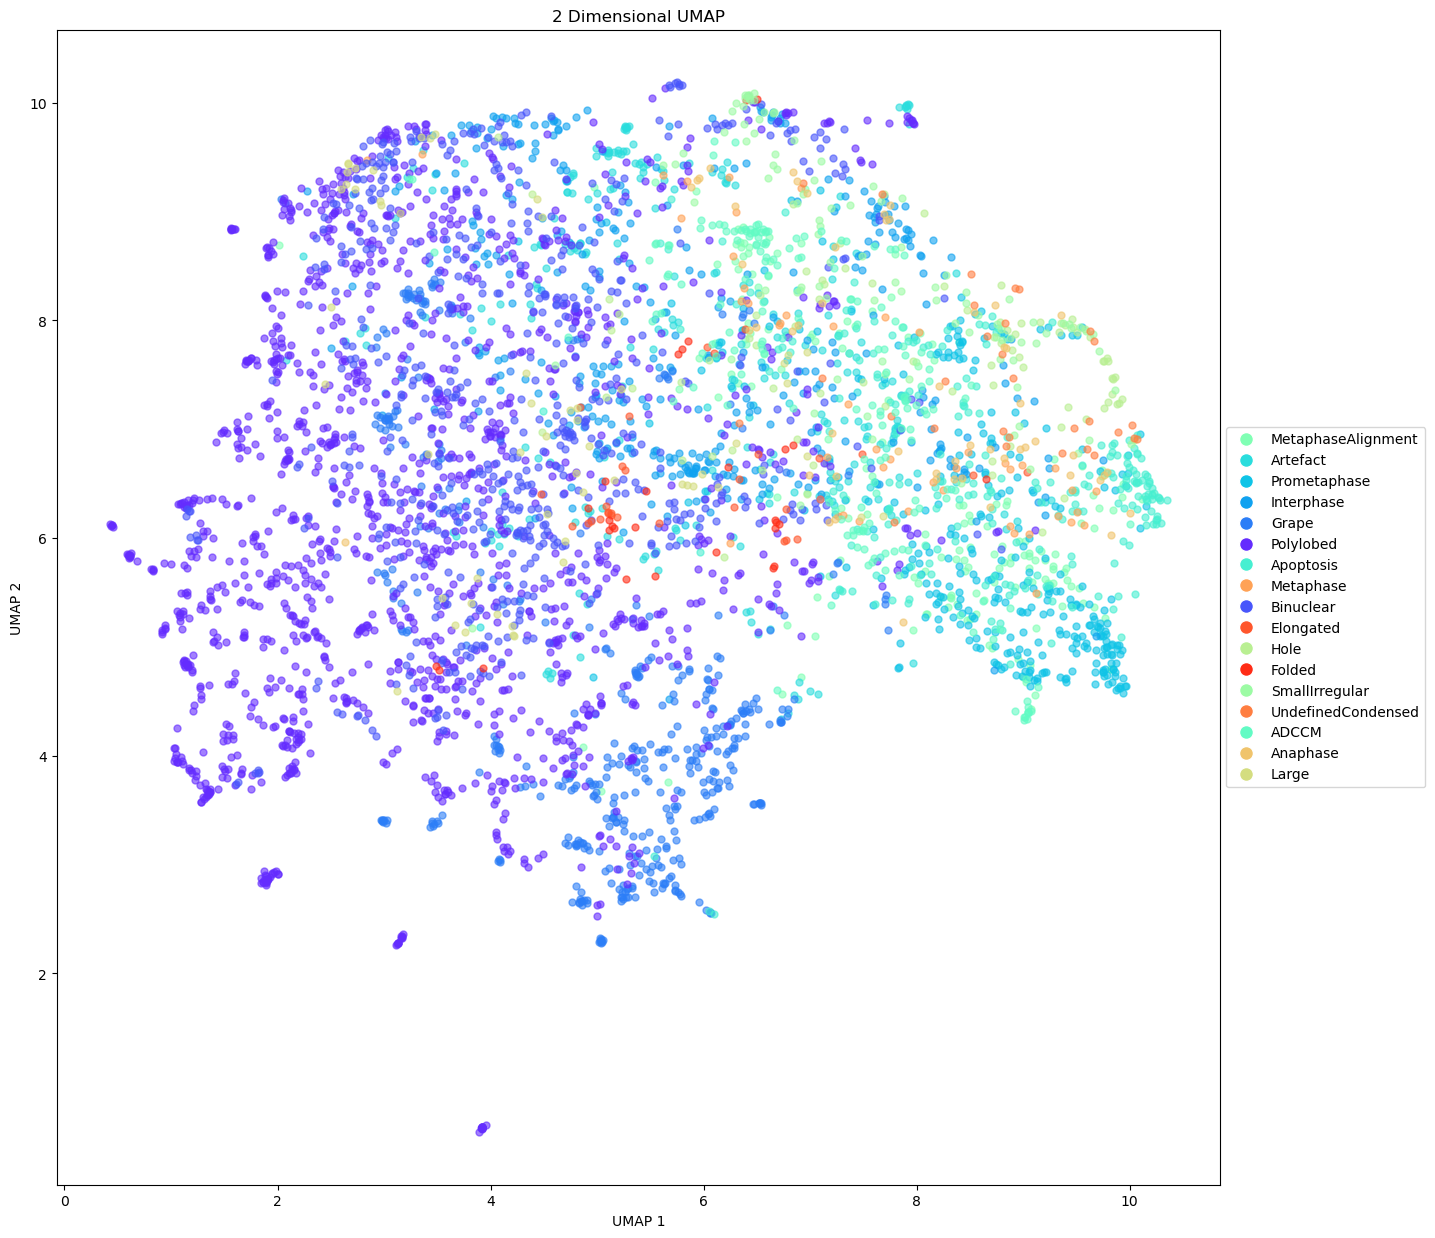

In [6]:
colored_classes = [
    "Polylobed",
    "Binuclear",
    "Grape",
    "Interphase",
    "Prometaphase",
    "Artefact",
    "Apoptosis",
    "ADCCM",
    "MetaphaseAlignment",
    "SmallIrregular",
    "Hole",
    "Large",
    "Anaphase",
    "Metaphase",
    "UndefinedCondensed",
    "Elongated",
    "Folded",
]

umap_2D_save_path = pathlib.Path(f"{save_dir}/norm_train_2D_umap.png")
show_2D_umap_grays(feature_data, phenotypic_classes, colored_classes, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha, palette="rainbow")

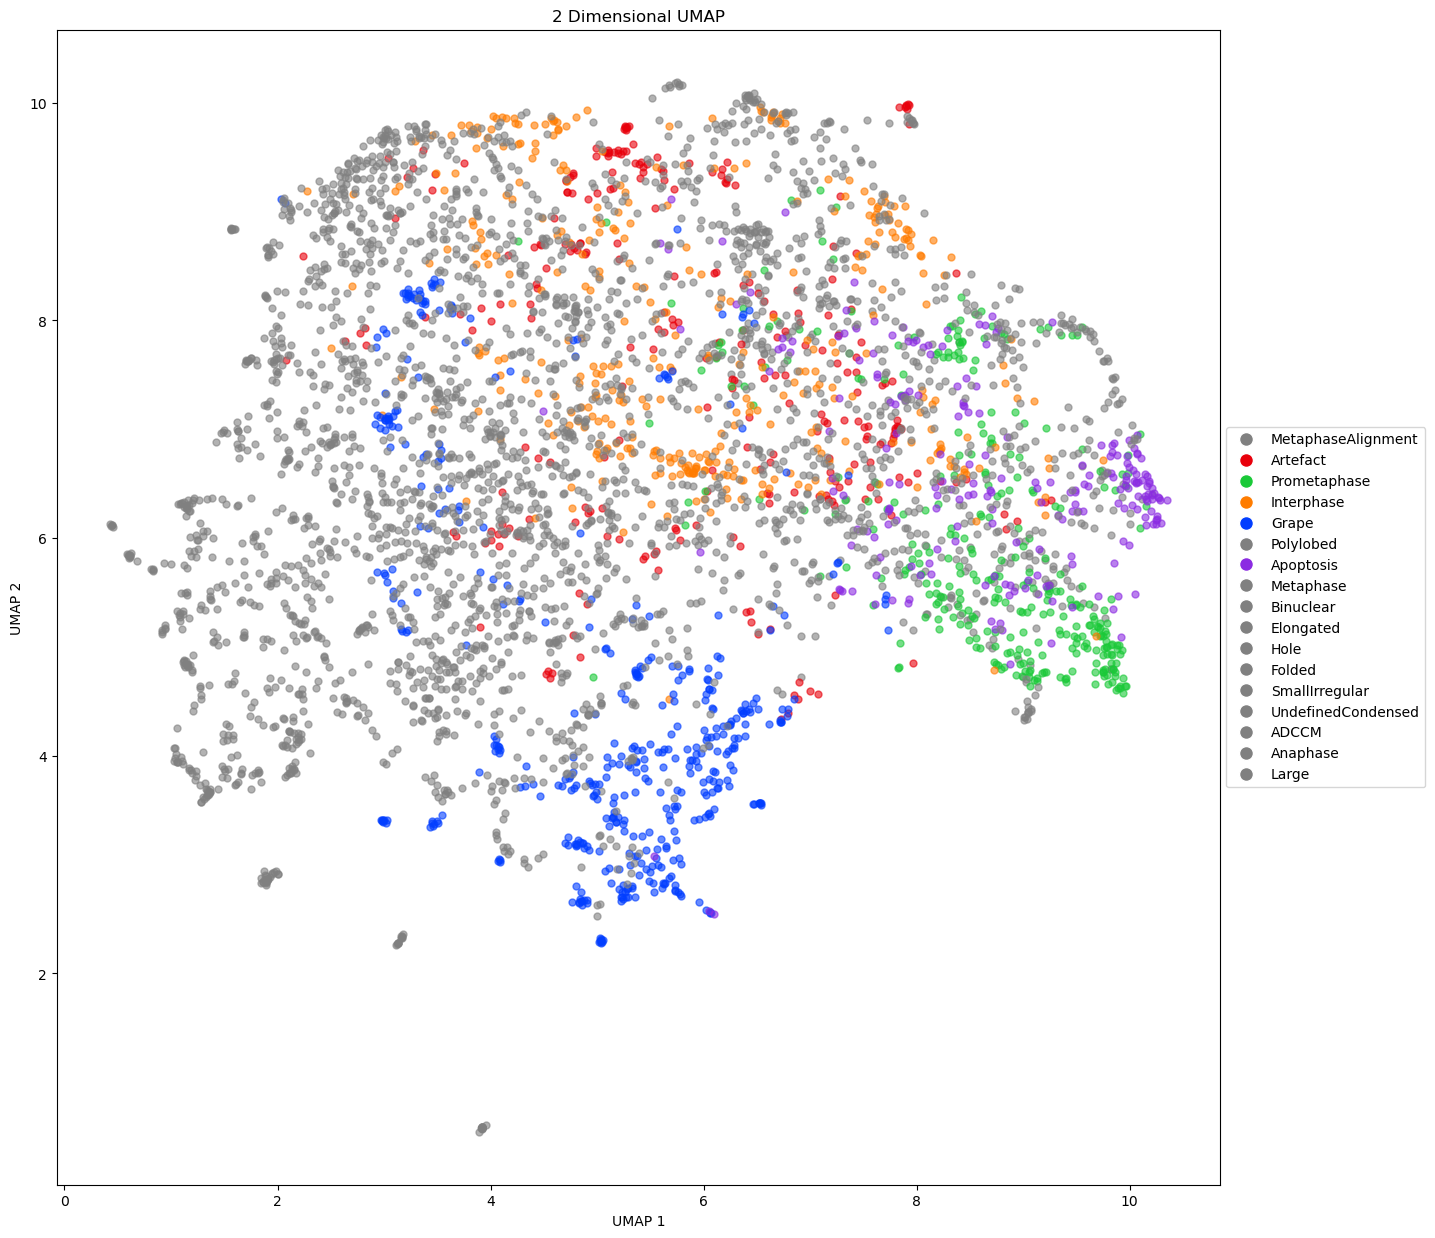

In [7]:
colored_classes = [
    # "Polylobed",
    # "Binuclear",
    "Grape",
    "Interphase",
    "Prometaphase",
    "Artefact",
    "Apoptosis",
    # "ADCCM",
    # "MetaphaseAlignment",
    # "SmallIrregular",
    # "Hole",
    # "Large",
    # "Anaphase",
    # "Metaphase",
    # "UndefinedCondensed",
    # "Elongated",
    # "Folded",
]

umap_2D_save_path = pathlib.Path(f"{save_dir}/norm_train_2D_umap.png")
show_2D_umap_grays(feature_data, phenotypic_classes, colored_classes, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha, palette="bright")

### 3D UMAP

In [8]:
umap_3D_save_path = pathlib.Path(f"{save_dir}/norm_train_3D_umap.png")
#show_3D_umap(feature_data, phenotypic_classes, save_path=umap_3D_save_path, point_size=point_size, alpha=alpha, palette=color_palette)